In [13]:
import cv2
import sys
import numpy as np
import glob
import os
from datetime import datetime
from matplotlib import pyplot as plt

In [26]:
files = glob.glob('*.jpg')
for file in files:
    image_name = file
    img = cv2.imread(image_name,0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.uint8(np.log(np.abs(fshift) + 1) * 10)

    output_dir = 'kspace_output/'
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)

    output_image_name = os.path.join(output_dir + image_name + "_kspace_" \
                        + datetime.now().strftime("%m%d-%H%M%S") + ".jpg")
    cv2.imwrite(output_image_name, magnitude_spectrum)
    cv2.waitKey(5)

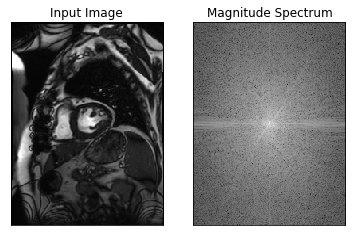

In [9]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()